<a href="https://colab.research.google.com/github/SubbulakshmiSN/Industrial_Cooper_Modeling-/blob/main/icm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`INDUSTRY COOPER MODELING`***





# *`IMPORTING LIBRARIES`*

In [1]:
!pip install Lazypredict

In [93]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

#data pre-processing
from sklearn.preprocessing import OrdinalEncoder

#statistics
from scipy.stats import skew, boxcox

#Supress Warnings
import warnings
warnings.filterwarnings("ignore")

#Visualization
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

#Machine Learning Training
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

#Machine Learning Evaluation Metrics
from sklearn.metrics import  precision_score, recall_score, classification_report, accuracy_score,confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_auc_score
import joblib

# *`READ THE DATA`*

In [10]:
df=pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv",on_bad_lines='warn')
df.head()

Skipping line 8434: expected 14 fields, saw 16
Skipping line 22165: expected 14 fields, saw 25



,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.00,54.15113862,30156308.00,28.00,Won,W,10.00,2.00,1500.00,DEQ1 S460MC,1670798778,20210701.00,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.00,768.0248392,30202938.00,25.00,Won,W,41.00,0.80,1210.00,0000000000000000000000000000000000104991,1668701718,20210401.00,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.00,386.1279489,30153963.00,30.00,Won,WI,28.00,0.38,952.00,S0380700,628377,20210101.00,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.00,202.4110654,30349574.00,32.00,Won,S,59.00,2.30,1317.00,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.00,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.00,785.5262616,30211560.00,28.00,Won,W,10.00,4.00,2000.00,2_S275JR+AR-CL1,640665,20210301.00,577.00


## *`DATA OBSERVATION`*

In [11]:
df.shape

(195402, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195402 entries, 0 to 195401
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             195400 non-null  object 
 1   item_date      195401 non-null  float64
 2   quantity tons  195402 non-null  object 
 3   customer       195401 non-null  float64
 4   country        195374 non-null  float64
 5   status         195400 non-null  object 
 6   item type      195402 non-null  object 
 7   application    195378 non-null  float64
 8   thickness      195401 non-null  float64
 9   width          195402 non-null  float64
 10  material_ref   111242 non-null  object 
 11  product_ref    195402 non-null  int64  
 12  delivery date  195401 non-null  float64
 13  selling_price  195401 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 20.9+ MB


In [13]:
df.nunique()

id               181670
item_date           252
quantity tons    181672
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [14]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     84160
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [15]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,195401.00,195401.00,195374.00,195378.00,195401.00,195402.00,195402.00,195401.00,195401.00
mean,20204315.77,30492927.20,44.73,25.64,2.58,1294.40,469749802.65,20206922.49,1828.05
std,4498.80,23463502.53,24.30,17.76,6.39,263.56,715248090.88,23308.62,319927.40
min,19950000.00,12458.00,25.00,2.00,0.18,1.00,611728.00,20190401.00,-1160.00
25%,20200909.00,30196884.00,26.00,10.00,0.70,1175.00,611993.00,20201001.00,652.92
50%,20201123.00,30205312.00,30.00,15.00,1.50,1250.00,640665.00,20210101.00,800.00
75%,20210129.00,30280416.00,78.00,41.00,3.00,1500.00,1332077137.00,20210401.00,945.00
max,20210401.00,2147483647.00,113.00,99.00,2500.00,2990.00,1722207579.00,30310101.00,100001015.00


In [16]:
'''
categorical columns= status,item_type,application,delivery date
Target for classifier= status
Target for regressor= selling price
'''

'\ncategorical columns= status,item_type,application,delivery date\nTarget for classifier= status\nTarget for regressor= selling price\n'

In [17]:
col=['status','country','item type','application','delivery date']
for i in col:
  print(i,":")
  print(df[i].unique())
  print("-----------------------")

status :
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable' nan]
-----------------------
country :
[ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80.  89. 107.  nan]
-----------------------
item type :
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
-----------------------
application :
[10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 65. 58. 69. 70. 68. nan]
-----------------------
delivery date :
[20210701. 20210401. 20210101. 20210301. 20210601. 20210501. 20210801.
 30310101. 20210901. 20211001. 20211101. 20220101. 20200701. 20201001.
 20200901. 20200801. 20200401. 20200101. 20201101. 20201201. 20200501.
 20200601. 20210201. 20211201. 20190701. 20190401.       nan 20212222.
 20191001.]
-----------------------


## *`DATA HANDLING`*

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195402 entries, 0 to 195401
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             195400 non-null  object 
 1   item_date      195401 non-null  float64
 2   quantity tons  195402 non-null  object 
 3   customer       195401 non-null  float64
 4   country        195374 non-null  float64
 5   status         195400 non-null  object 
 6   item type      195402 non-null  object 
 7   application    195378 non-null  float64
 8   thickness      195401 non-null  float64
 9   width          195402 non-null  float64
 10  material_ref   111242 non-null  object 
 11  product_ref    195402 non-null  int64  
 12  delivery date  195401 non-null  float64
 13  selling_price  195401 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 20.9+ MB


In [19]:
#converting data types of some columns
df["quantity tons"]=pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date"]=pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery date"]=pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.02,30202938.00,25.00,Won,W,41.00,0.80,1210.00,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [20]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        2
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     84160
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [21]:
#material_ref have more nulls
print("before",np.round(df['material_ref'].isnull().mean()*100,2),"% missing values")

before 43.07 % missing values


In [22]:
#trying to clean material_ref
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [23]:
print("after",np.round(df['material_ref'].isnull().mean()*100,2),"% missing values")

after 55.57 % missing values


In [24]:
#dropping columns material_ref as it has more nulls and id as it is unique
df.drop(columns=["material_ref","id"],inplace=True)

In [25]:
df.isnull().sum()

item_date         3
quantity tons     2
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [26]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,195400.00,195401.00,195374.00,195378.00,195401.00,195402.00,195402.00,195401.00
mean,10843.47,30492927.20,44.73,25.64,2.58,1294.40,469749802.65,1828.05
std,3203269.92,23463502.53,24.30,17.76,6.39,263.56,715248090.88,319927.40
min,-2000.00,12458.00,25.00,2.00,0.18,1.00,611728.00,-1160.00
25%,11.03,30196884.00,26.00,10.00,0.70,1175.00,611993.00,652.92
50%,30.42,30205312.00,30.00,15.00,1.50,1250.00,640665.00,800.00
75%,67.39,30280416.00,78.00,41.00,3.00,1500.00,1332077137.00,945.00
max,1000000000.00,2147483647.00,113.00,99.00,2500.00,2990.00,1722207579.00,100001015.00


In [27]:
#quantity and selling price goes negative its not possible so changing them a null
df["quantity tons"]=df["quantity tons"].apply(lambda x: np.nan if x <=0 else x)
df["selling_price"]=df["selling_price"].apply(lambda x: np.nan if x <=0 else x)
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,195394.00,195401.00,195374.00,195378.00,195401.00,195402.00,195402.00,195394.00
mean,10843.83,30492927.20,44.73,25.64,2.58,1294.40,469749802.65,1828.12
std,3203319.11,23463502.53,24.30,17.76,6.39,263.56,715248090.88,319933.13
min,0.00,12458.00,25.00,2.00,0.18,1.00,611728.00,0.10
25%,11.03,30196884.00,26.00,10.00,0.70,1175.00,611993.00,653.00
50%,30.42,30205312.00,30.00,15.00,1.50,1250.00,640665.00,800.00
75%,67.39,30280416.00,78.00,41.00,3.00,1500.00,1332077137.00,945.00
max,1000000000.00,2147483647.00,113.00,99.00,2500.00,2990.00,1722207579.00,100001015.00


In [28]:
#handling nulls using median and mode

category_cols=["delivery date","status","item_date"]
continuous_cols=["quantity tons","application","thickness","selling_price","customer","country"]

for col in category_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

for col in continuous_cols:
  df[col]=df[col].fillna(df[col].median())

df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [29]:
for col in ["item type","status"]:
    print(col,":")
    print(df[col].value_counts())
    print("----"*20)

item type :
item type
W         113089
S          75224
PL          5908
Others       615
WI           538
IPL           27
SLAWR          1
Name: count, dtype: int64
--------------------------------------------------------------------------------
status :
status
Won                124770
Lost                37224
Not lost for AM     20988
Revised              4702
To be approved       4269
Draft                3382
Offered                56
Offerable              10
Wonderful               1
Name: count, dtype: int64
--------------------------------------------------------------------------------


## *`SKEWNESS OF THE DATA`*

In [30]:
#skew handling

def skewness(df,*column):
    number_row=len(column)
    plot_no=0

    for col_name in column:
        if "log" in col_name or "sqrt" in col_name or "boxcox" in col_name:
            title= 'After Transformation'
        else:
            title= 'Before Transformation'

        plt.figure(figsize=(18,18))

        plot_no+=1
        plt.subplot(number_row,3,plot_no)
        sns.boxplot(x=col_name, data=df, color="orange")
        plt.title('Boxplot-'+title)

        plot_no+=1
        plt.subplot(number_row,3,plot_no)
        sns.histplot(df[col_name], kde=True, bins=30, color="red")
        plt.title(f'Distplot- skewness: {skew(df[col_name])}')

        plot_no+=1
        plt.subplot(number_row,3,plot_no)
        sns.violinplot(x=col_name, data=df, color="green")
        plt.title("violinplot-"+title)

    plt.tight_layout()
    return plt.show()


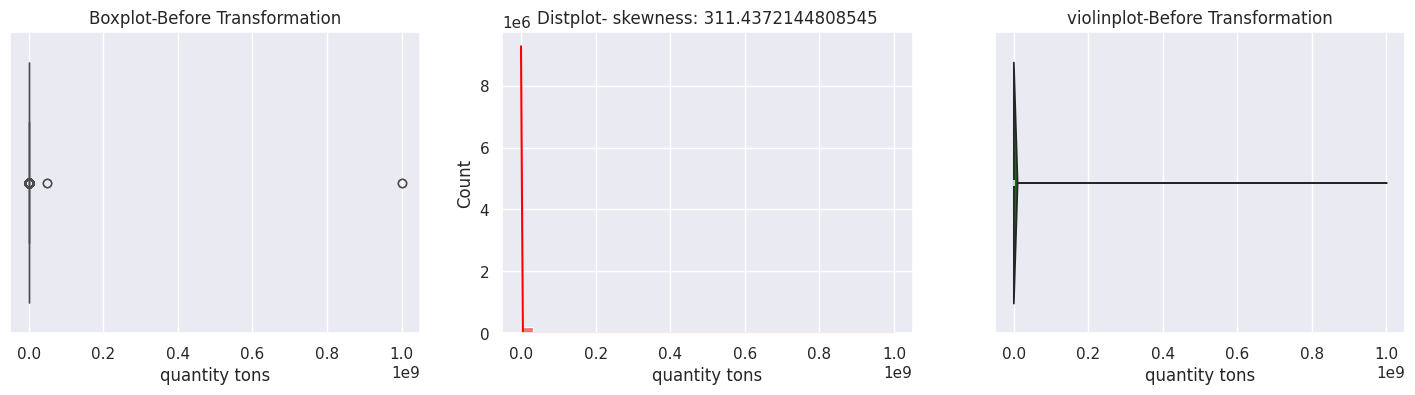

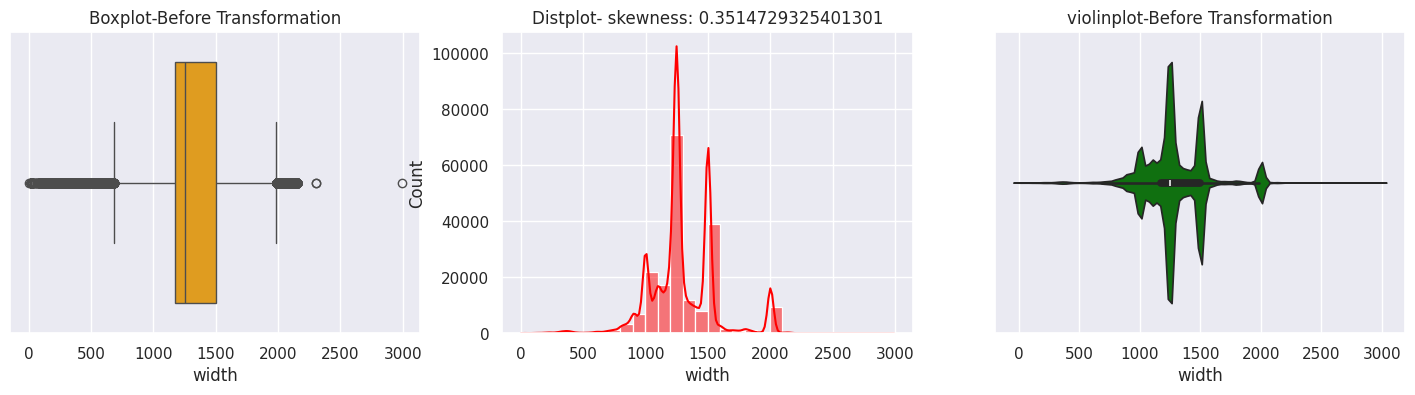

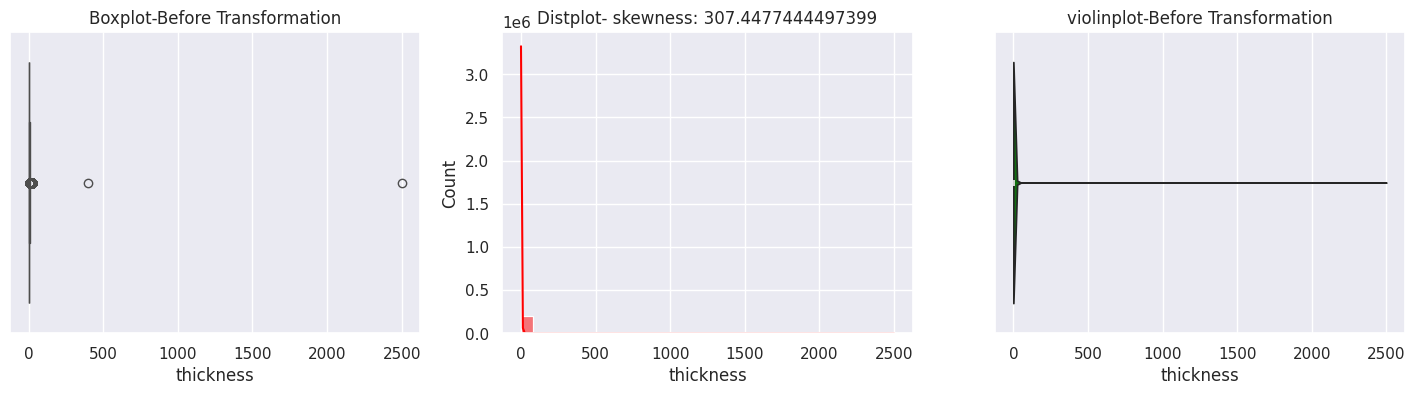

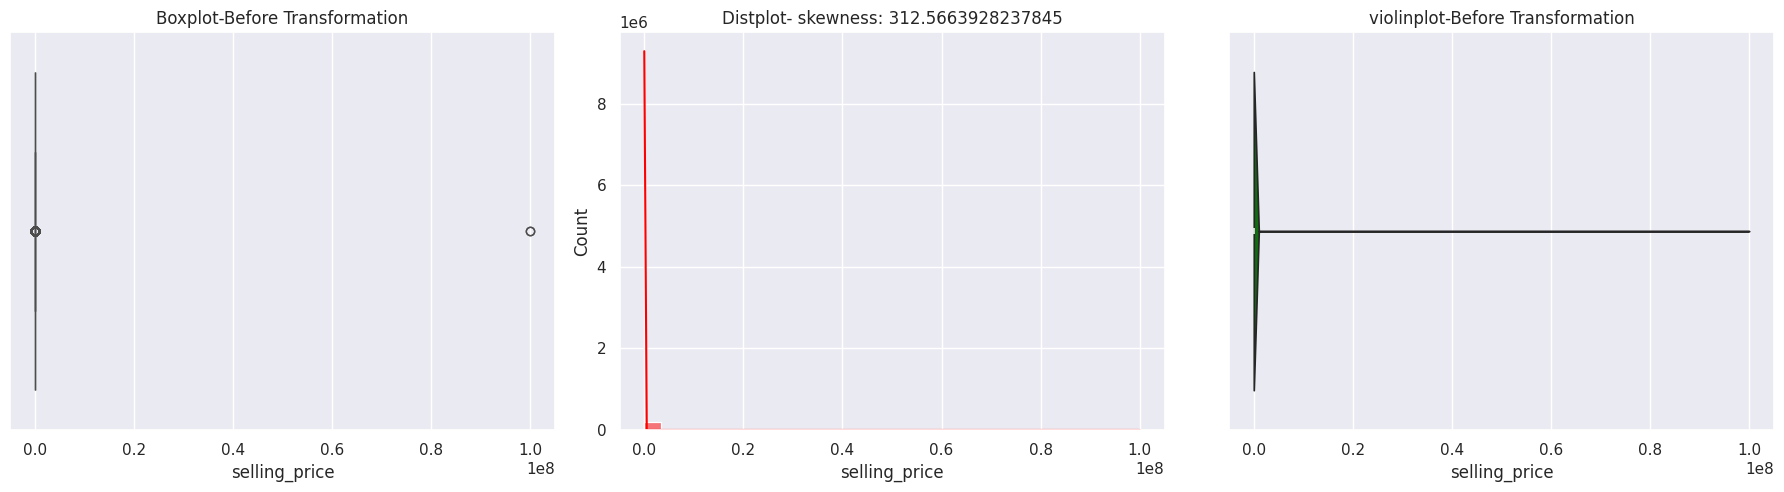

In [31]:
#specifying numerical cols
continuous_cols=["quantity tons","width","thickness","selling_price"]
skew_plot=skewness(df,*continuous_cols)
skew_plot


In [32]:
#quantity tons,thickness and selling price are right skewed, using log transformation

def log_transformation(df,*column):
    for col_name in column:
      df[col_name + '_log_skewed']=np.log1p(df[col_name])

    column=[i for i in df.columns if "log" in i]

    return skewness(df,*column)

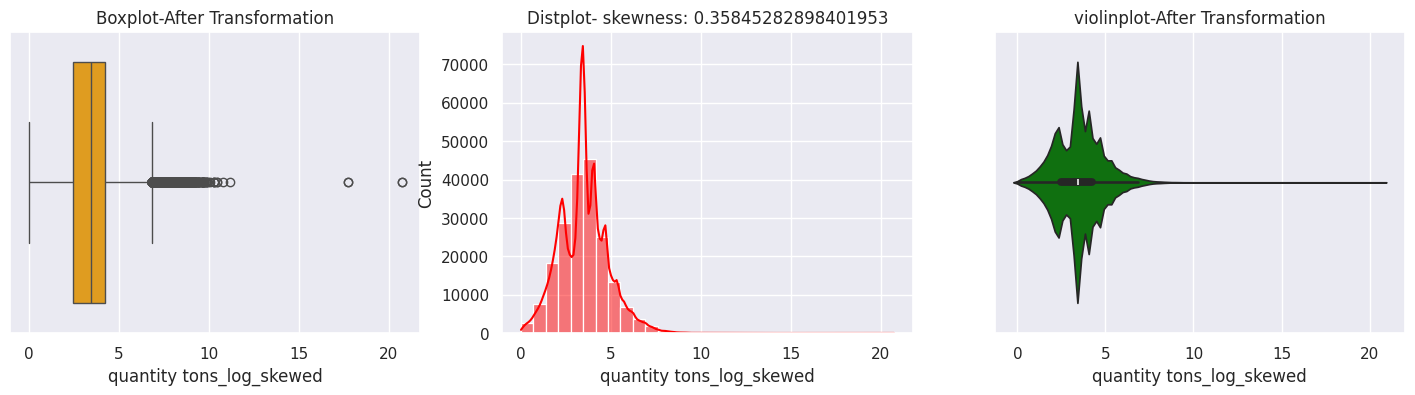

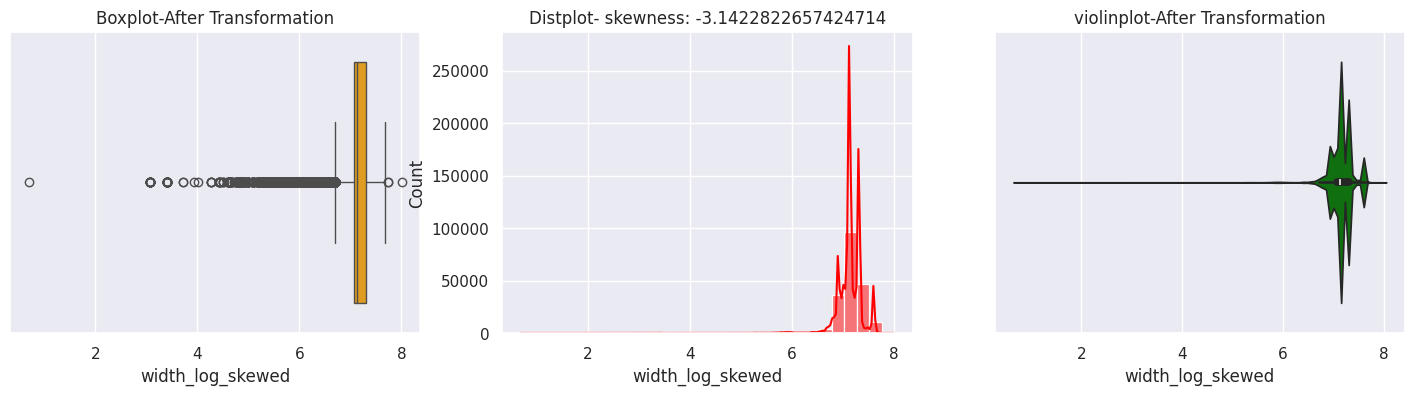

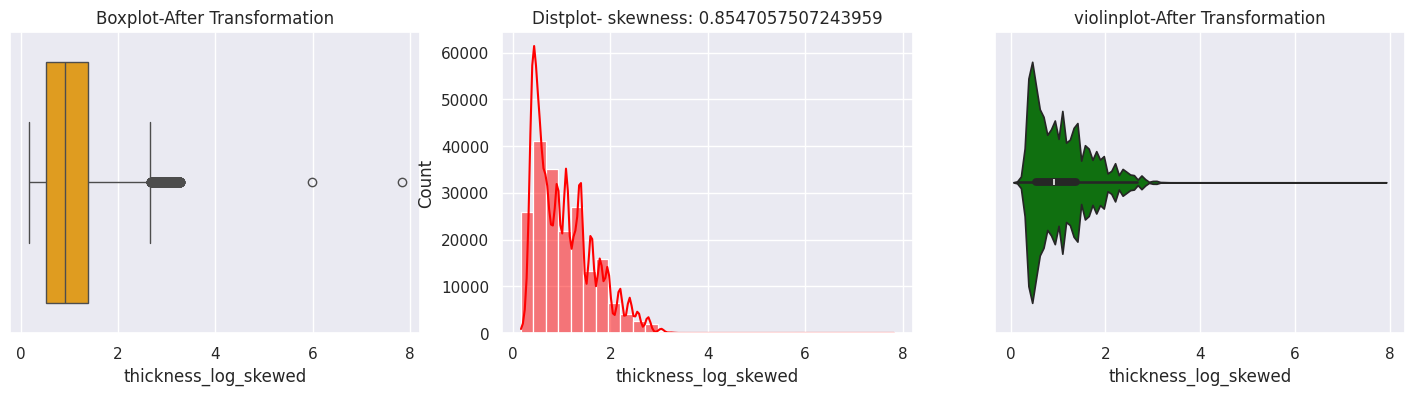

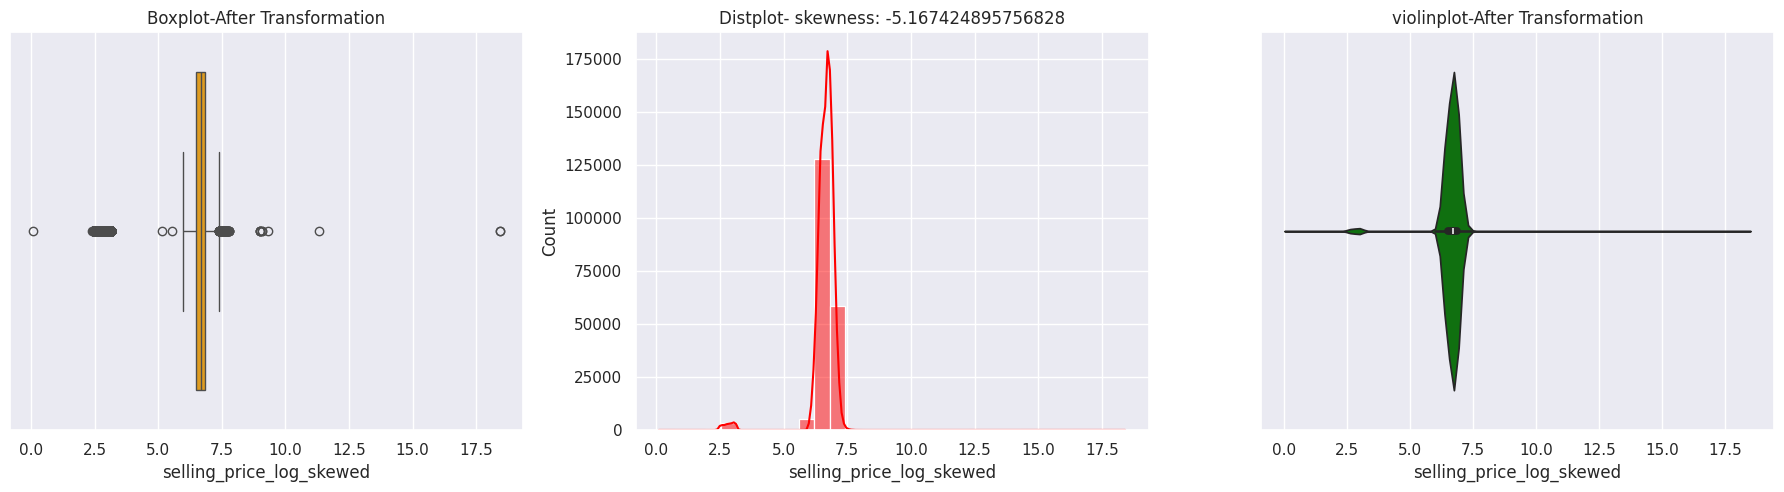

In [33]:
log_transformation(df,*continuous_cols)

## *`HANDLING OUTLIERS`*

In [34]:
#handling outliers
df1=df.copy()


In [35]:
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log_skewed,width_log_skewed,thickness_log_skewed,selling_price_log_skewed
0,2021-04-01,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,1670798778,2021-07-01,854.00,4.01,7.31,1.10,6.75
1,2021-04-01,768.02,30202938.00,25.00,Won,W,41.00,0.80,1210.00,1668701718,2021-04-01,1047.00,6.65,7.10,0.59,6.95
2,2021-04-01,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,628377,2021-01-01,644.33,5.96,6.86,0.32,6.47
3,2021-04-01,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,1668701718,2021-01-01,768.00,5.32,7.18,1.19,6.65
4,2021-04-01,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,640665,2021-03-01,577.00,6.67,7.60,1.61,6.36


In [36]:
def outliers(df):
   plt.figure(figsize=(18,18))

   plt.subplot(2,2,1)
   sns.boxplot(x='width', data=df)
   plt.title('Boxplot-width')

   plt.subplot(2,2,2)
   sns.boxplot(x='thickness_log_skewed', data=df)
   plt.title('Boxplot-thickness_log_skewed')

   plt.subplot(2,2,3)
   sns.boxplot(x='selling_price_log_skewed', data=df)
   plt.title('Boxplot-selling_price_log_skewed')

   plt.subplot(2,2,4)
   sns.boxplot(x='quantity tons_log_skewed', data=df)
   plt.title('Boxplot-quantity tons_log_skewed')

   plt.tight_layout()

   return plt.show()



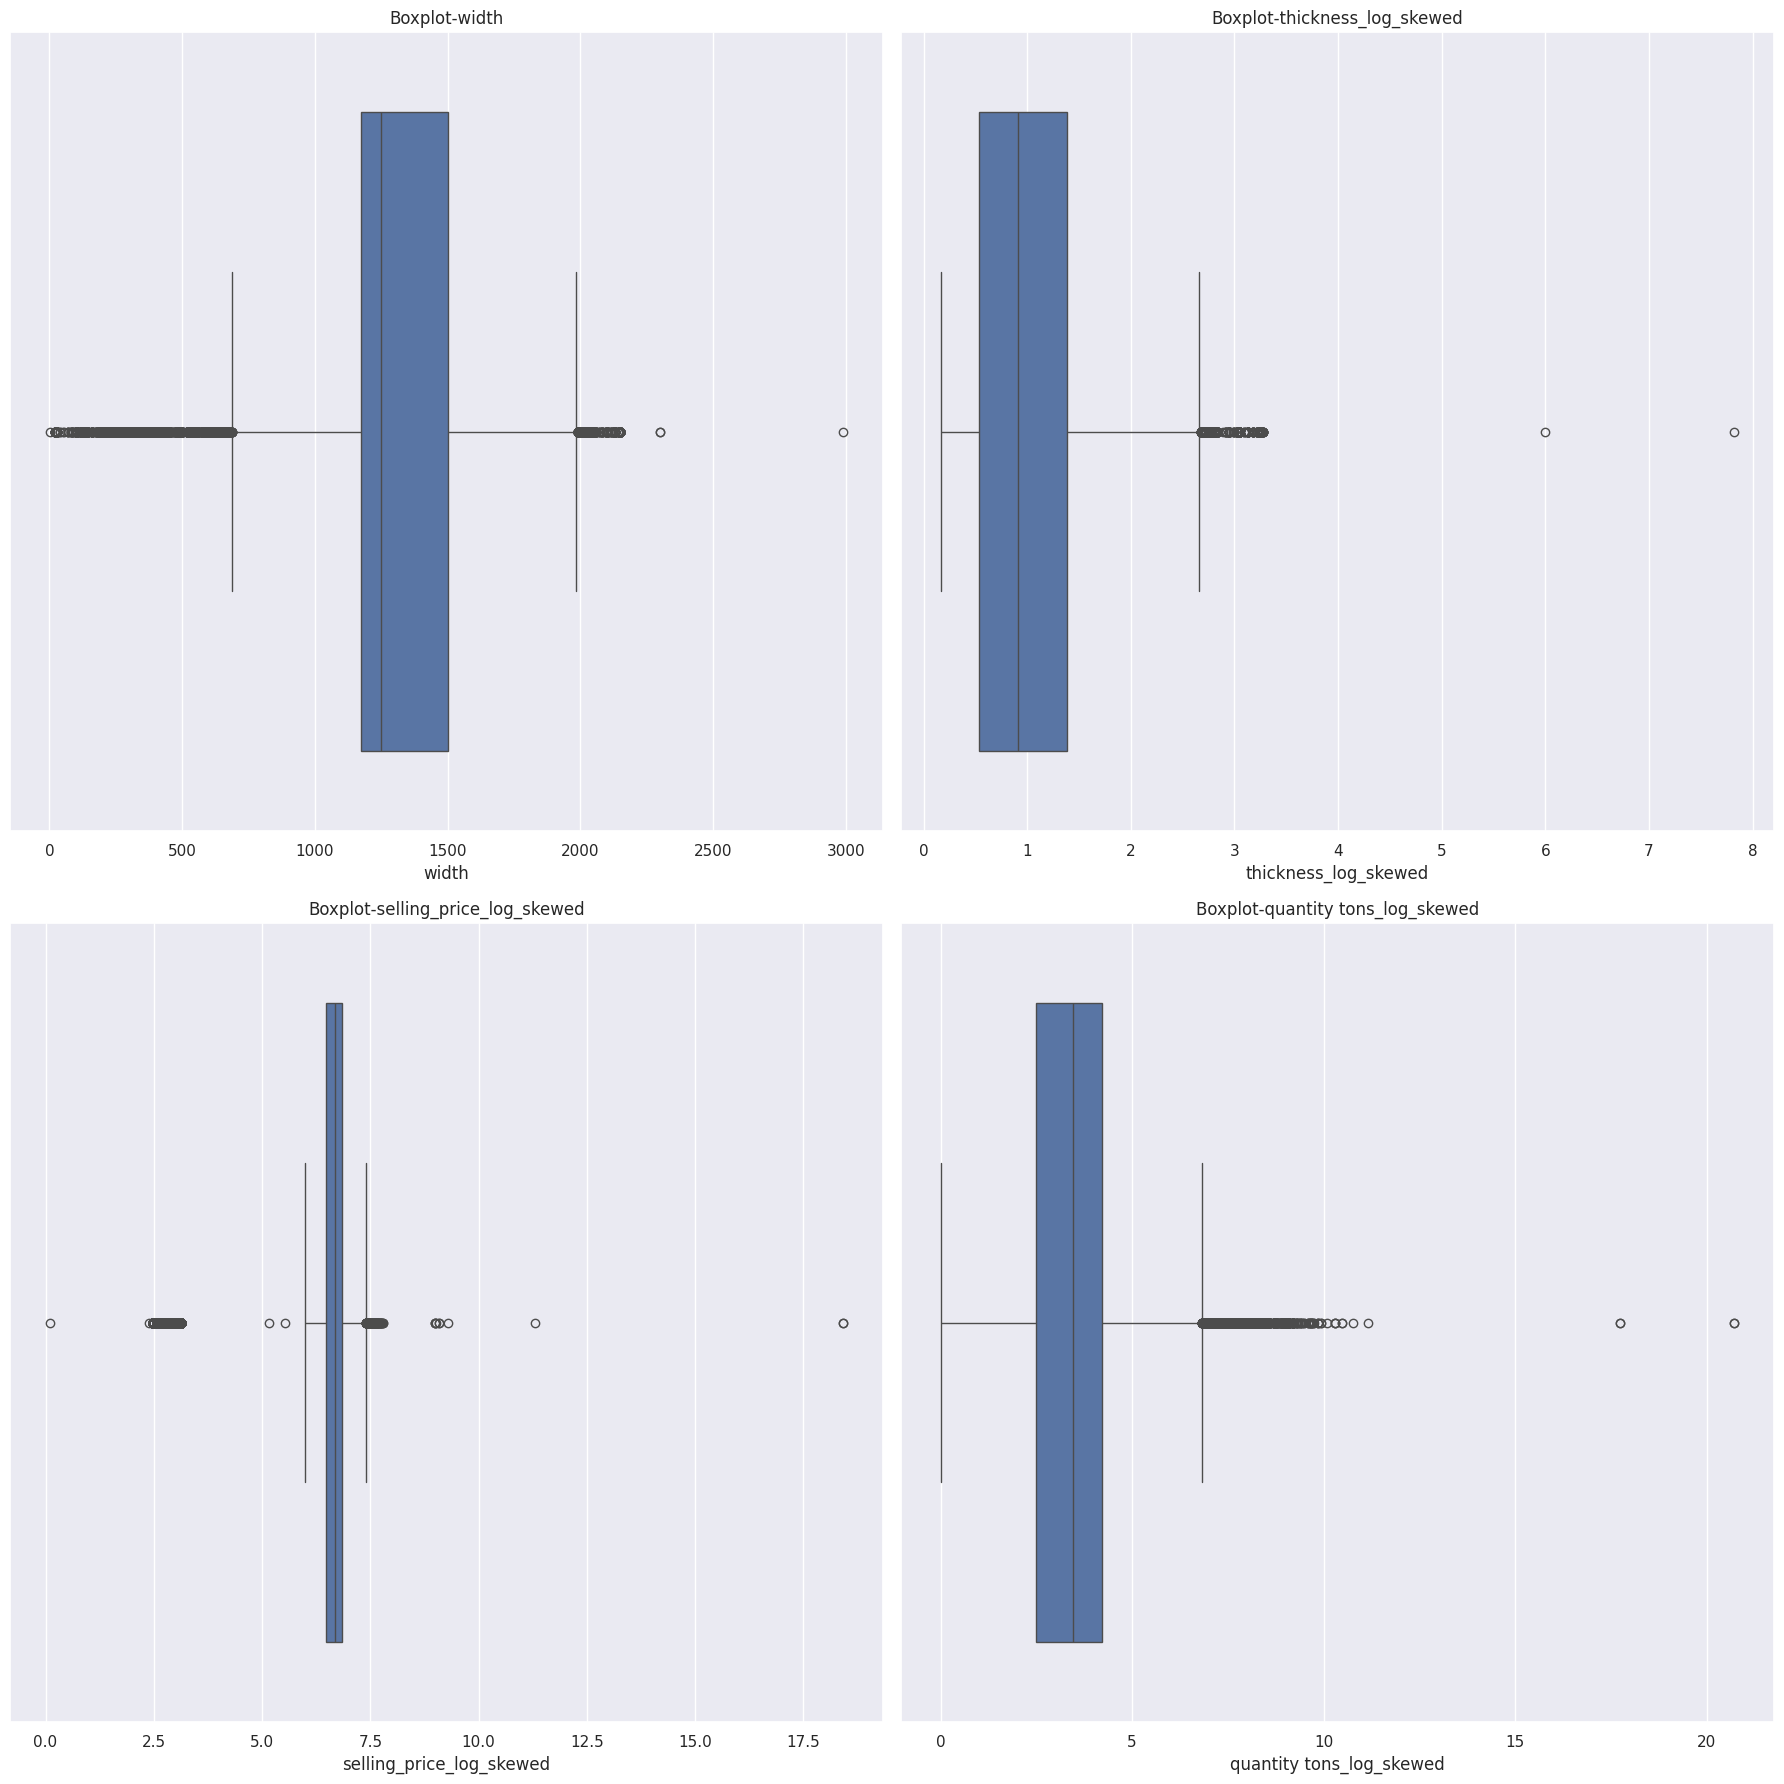

In [37]:
outliers(df1)

In [38]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,195402.00,10843.38,3203253.53,0.00,11.03,30.42,67.39,1000000000.00
customer,195402.00,30492925.73,23463442.50,12458.00,30196884.00,30205312.00,30280416.00,2147483647.00
country,195402.00,44.72,24.29,25.00,26.00,30.00,78.00,113.00
application,195402.00,25.64,17.76,2.00,10.00,15.00,41.00,99.00
thickness,195402.00,2.58,6.39,0.18,0.70,1.50,3.00,2500.00
width,195402.00,1294.40,263.56,1.00,1175.00,1250.00,1500.00,2990.00
product_ref,195402.00,469749802.65,715248090.88,611728.00,611993.00,640665.00,1332077137.00,1722207579.00
selling_price,195402.00,1828.08,319926.58,0.10,653.00,800.00,945.00,100001015.00
quantity tons_log_skewed,195402.00,3.48,1.33,0.00,2.49,3.45,4.23,20.72
width_log_skewed,195402.00,7.14,0.23,0.69,7.07,7.13,7.31,8.00


In [39]:
#using IQR method to remove outliers
def outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    #lower threshold =5 and upper threshold = 20
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    df[column]=df[column].clip(lower_threshold,upper_threshold)


outlier(df1,'quantity tons_log_skewed')
outlier(df1,'width_log_skewed')
outlier(df1,'thickness_log_skewed')
outlier(df1,'selling_price_log_skewed')



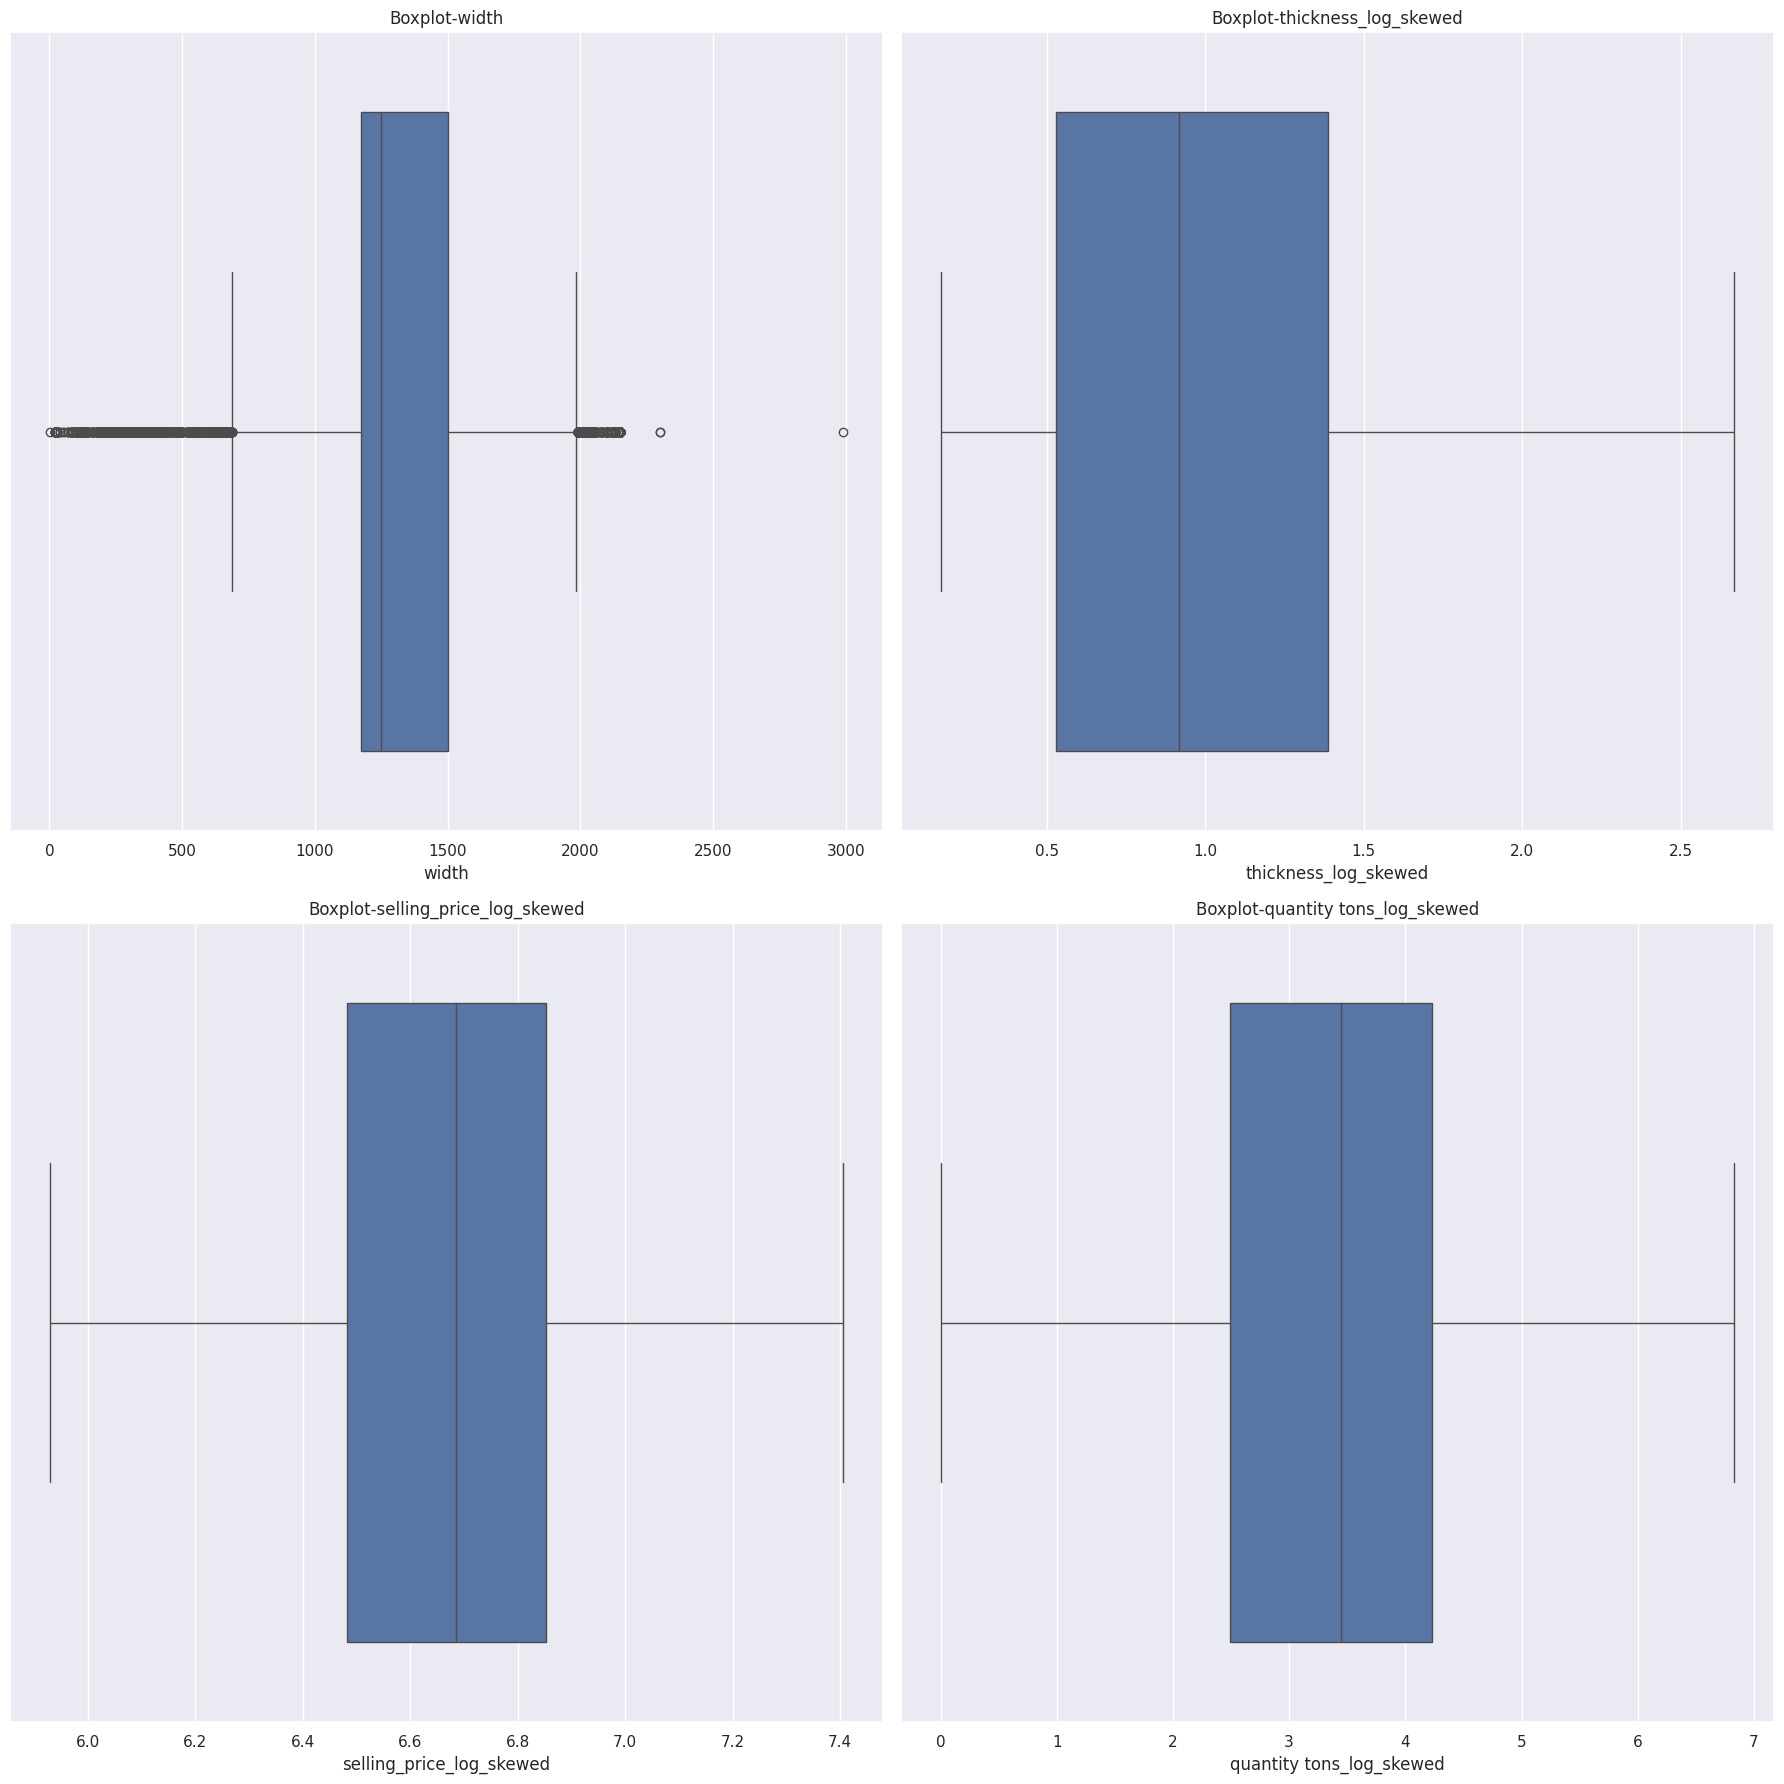

In [40]:
outliers(df1)

In [41]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,195402.00,10843.38,3203253.53,0.00,11.03,30.42,67.39,1000000000.00
customer,195402.00,30492925.73,23463442.50,12458.00,30196884.00,30205312.00,30280416.00,2147483647.00
country,195402.00,44.72,24.29,25.00,26.00,30.00,78.00,113.00
application,195402.00,25.64,17.76,2.00,10.00,15.00,41.00,99.00
thickness,195402.00,2.58,6.39,0.18,0.70,1.50,3.00,2500.00
width,195402.00,1294.40,263.56,1.00,1175.00,1250.00,1500.00,2990.00
product_ref,195402.00,469749802.65,715248090.88,611728.00,611993.00,640665.00,1332077137.00,1722207579.00
selling_price,195402.00,1828.08,319926.58,0.10,653.00,800.00,945.00,100001015.00
quantity tons_log_skewed,195402.00,3.47,1.30,0.00,2.49,3.45,4.23,6.83
width_log_skewed,195402.00,7.15,0.19,6.70,7.07,7.13,7.31,7.68


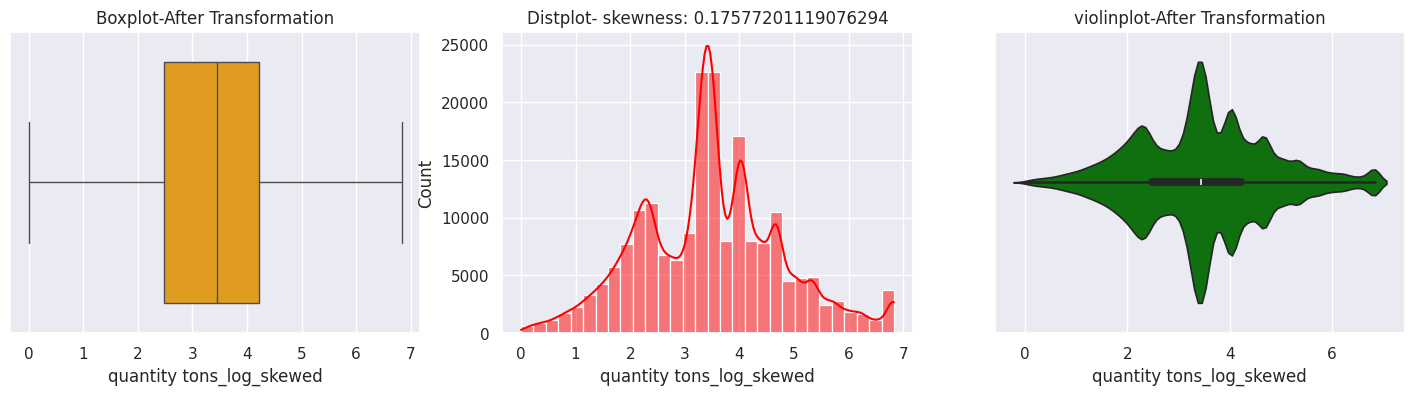

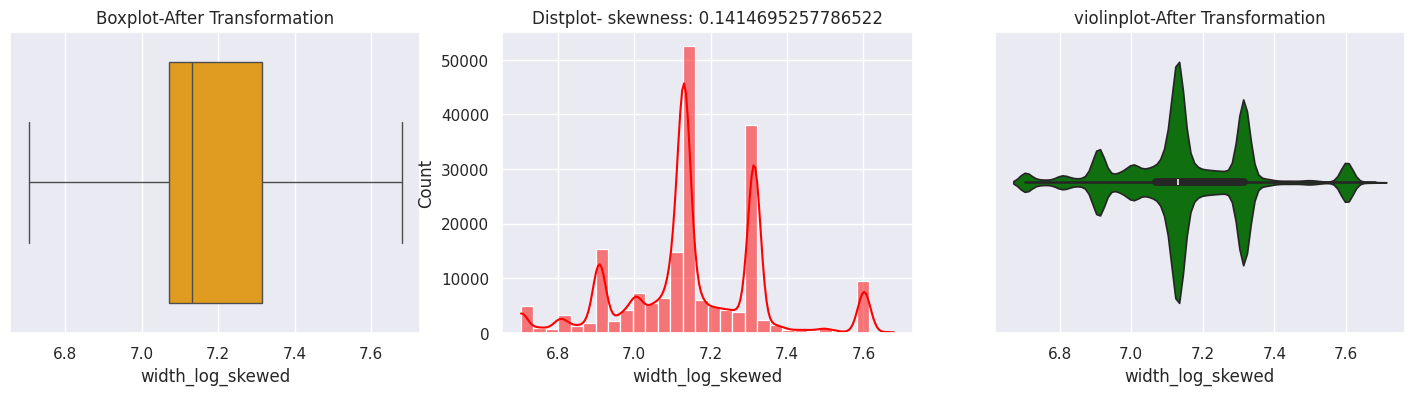

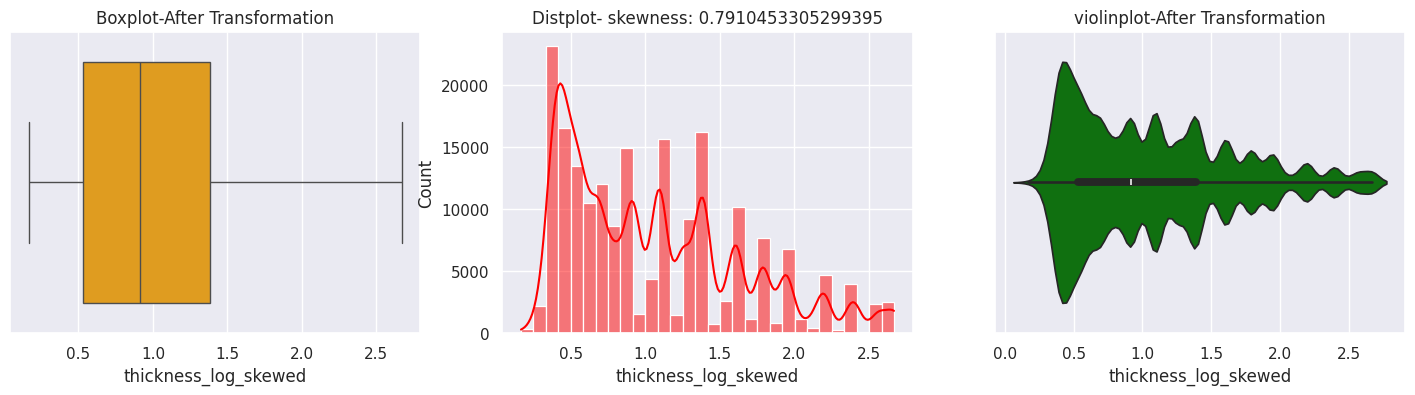

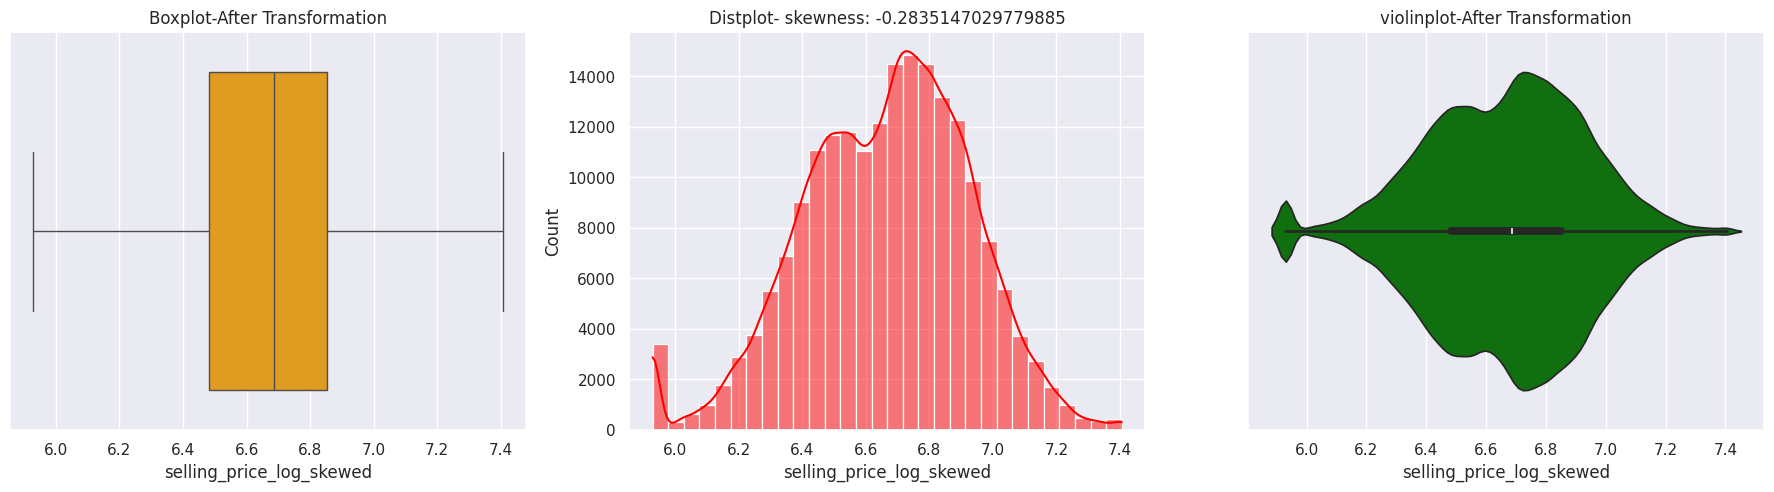

In [42]:
outlier_cols=['quantity tons_log_skewed','width_log_skewed','thickness_log_skewed','selling_price_log_skewed']
skewness(df1,*outlier_cols)

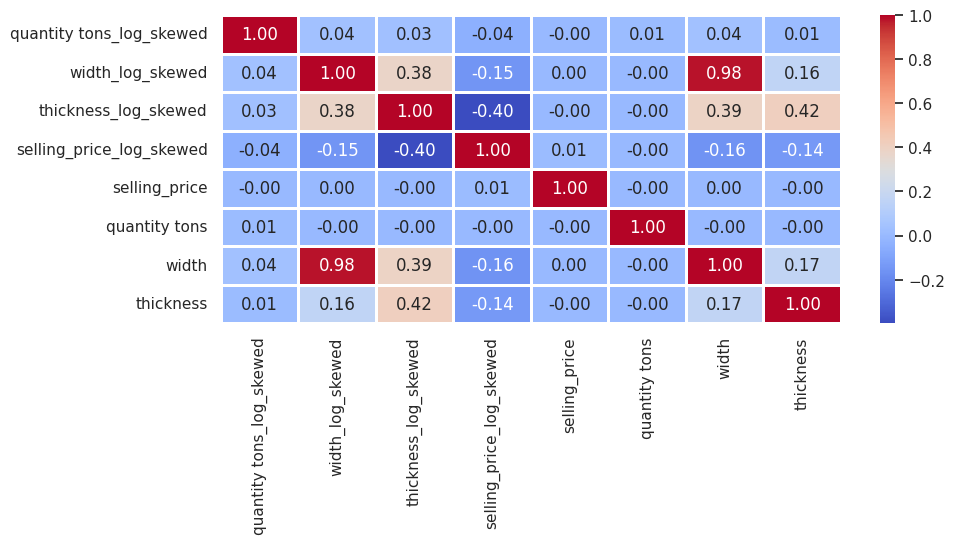

In [43]:
#correlation matrix
plt.figure(figsize=(10,4))
cols=['quantity tons_log_skewed','width_log_skewed','thickness_log_skewed','selling_price_log_skewed','selling_price','quantity tons',"width","thickness"]
sns.heatmap(df1[cols].corr(),annot=True,fmt='.2f',linewidths=2,cmap='coolwarm')
plt.show()

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195402 entries, 0 to 195401
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   item_date                 195402 non-null  object 
 1   quantity tons             195402 non-null  float64
 2   customer                  195402 non-null  float64
 3   country                   195402 non-null  float64
 4   status                    195402 non-null  object 
 5   item type                 195402 non-null  object 
 6   application               195402 non-null  float64
 7   thickness                 195402 non-null  float64
 8   width                     195402 non-null  float64
 9   product_ref               195402 non-null  int64  
 10  delivery date             195402 non-null  object 
 11  selling_price             195402 non-null  float64
 12  quantity tons_log_skewed  195402 non-null  float64
 13  width_log_skewed          195402 non-null  f

In [45]:
#finding the difference between delivery date and item order date

df1['difference_day']=(pd.to_datetime(df1['delivery date'])-pd.to_datetime(df1['item_date'])).dt.days

df1["item_date"] = pd.to_datetime(df1["item_date"], format="%Y/%m/%d")
df1["delivery date"] = pd.to_datetime(df1["delivery date"], format="%Y/%m/%d")

df1["item_date_day"] = df1["item_date"].dt.day
df1["item_date_month"] = df1["item_date"].dt.month
df1["item_date_year"] = df1["item_date"].dt.year

df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log_skewed,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
0,2021-04-01,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,1670798778,2021-07-01,854.00,4.01,7.31,1.10,6.75,91,1,4,2021
1,2021-04-01,768.02,30202938.00,25.00,Won,W,41.00,0.80,1210.00,1668701718,2021-04-01,1047.00,6.65,7.10,0.59,6.95,0,1,4,2021
2,2021-04-01,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,628377,2021-01-01,644.33,5.96,6.86,0.32,6.47,-90,1,4,2021
3,2021-04-01,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,1668701718,2021-01-01,768.00,5.32,7.18,1.19,6.65,-90,1,4,2021
4,2021-04-01,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,640665,2021-03-01,577.00,6.67,7.60,1.61,6.36,-31,1,4,2021


In [46]:
#splitting the negative difference day and positive difference day in separate dataframe
positive_delivery_df=df1[df1['difference_day']>0]
negative_delivery_df=df1[df1['difference_day']<0]

print(positive_delivery_df.shape)
print(negative_delivery_df.shape)

(173850, 20)
(21092, 20)


In [47]:
positive_delivery_df.head(5)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log_skewed,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
0,2021-04-01,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,1670798778,2021-07-01,854.00,4.01,7.31,1.10,6.75,91,1,4,2021
6,2021-04-01,3.52,30209509.00,30.00,Draft,W,41.00,0.38,1125.00,611993,2021-07-01,18.00,1.51,7.03,0.32,5.93,91,1,4,2021
8,2021-04-01,69.07,30341428.00,38.00,Won,S,10.00,0.60,1275.00,1668701376,2021-07-01,1363.00,4.25,7.15,0.47,7.22,91,1,4,2021
10,2021-04-01,9.18,30209509.00,30.00,Draft,W,41.00,0.38,1125.00,611993,2021-07-01,17.00,2.32,7.03,0.32,5.93,91,1,4,2021
12,2021-04-01,27.51,30165529.00,78.00,Won,W,10.00,0.75,1250.00,164141591,2021-07-01,1098.00,3.35,7.13,0.56,7.00,91,1,4,2021


In [48]:
negative_delivery_df.head(5)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log_skewed,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
2,2021-04-01,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,628377,2021-01-01,644.33,5.96,6.86,0.32,6.47,-90,1,4,2021
3,2021-04-01,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,1668701718,2021-01-01,768.00,5.32,7.18,1.19,6.65,-90,1,4,2021
4,2021-04-01,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,640665,2021-03-01,577.00,6.67,7.60,1.61,6.36,-31,1,4,2021
7,2021-04-01,113.39,30342192.00,32.00,Won,W,41.00,0.68,1220.00,611993,2021-01-01,931.00,4.74,7.11,0.52,6.84,-90,1,4,2021
11,2021-04-01,114.00,30342192.00,32.00,Won,W,41.00,0.55,1220.00,611993,2021-01-01,954.00,4.74,7.11,0.44,6.86,-90,1,4,2021


## *`MACHINE LEARNING`*

In [49]:
#predicting the delivery date using regressor models

pos_df=positive_delivery_df.copy()
neg_df=negative_delivery_df.copy()


In [50]:
pos_df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity tons_log_skewed',
       'width_log_skewed', 'thickness_log_skewed', 'selling_price_log_skewed',
       'difference_day', 'item_date_day', 'item_date_month', 'item_date_year'],
      dtype='object')

In [51]:
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              GradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [52]:
#finding the best model using the model
class Regression:

    def __init__(self, x, y):
        self.models = {
            'AdaBoostRegressor': AdaBoostRegressor(),
            'RandomForestRegressor': RandomForestRegressor(),
            'ExtraTreesRegressor': ExtraTreesRegressor(),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'DecisionTreeRegressor': DecisionTreeRegressor(),
            'XGBRegressor': XGBRegressor()
        }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def evaluate_model(self, model_name, model):
        y_train_pred = model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred = model.predict(self.x_test)

        result = {
            'Model_Name': model_name,
            'accuracy': model.score(self.x_test, self.y_test),
            'Train_Mean_Square_Error': f'{mean_squared_error(self.y_train, y_train_pred):.4e}',
            'Test_Mean_Square_Error': f'{mean_squared_error(self.y_test, y_test_pred):.4e}',
            'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred), 4),
            'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred), 4),
            'Train_R2_Score': f'{r2_score(self.y_train, y_train_pred):.4e}',
            'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4),
        }

        return result

    def best_model(self):
        reults=[self.evaluate_model(name, model) for name, model in self.models.items()]
        self.best_model_score= pd.DataFrame(reults)
        return self.best_model_score

In [53]:
#encoding the categorical columns
encoder=OrdinalEncoder()
cols=['status','item type','item_date','delivery date']
for col in cols:
   pos_df[col]=encoder.fit_transform(pos_df[[col]])
   neg_df[col]=encoder.fit_transform(neg_df[[col]])


In [54]:
#splitting data into dependent and independent variables
x=pos_df.drop(['delivery date','item_date','difference_day','width','thickness','selling_price','quantity tons'],axis=1)
y=pos_df['difference_day']

In [55]:
#train using regressor models
models=Regression(x,y)
models.best_model()

,Model_Name,accuracy,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,0.10,1.3577e+03,1.3565e+03,31.29,31.30,1.0979e-01,0.10
1,RandomForestRegressor,0.95,1.1279e+01,7.4964e+01,1.27,3.32,9.9260e-01,0.95
2,ExtraTreesRegressor,0.96,0.0000e+00,5.7351e+01,0.00,2.38,1.0000e+00,0.96
3,GradientBoostingRegressor,0.55,6.7840e+02,6.7373e+02,20.32,20.26,5.5519e-01,0.55
4,DecisionTreeRegressor,0.90,0.0000e+00,1.4776e+02,0.00,2.90,1.0000e+00,0.90
5,XGBRegressor,0.83,2.3706e+02,2.6130e+02,10.63,11.10,8.4457e-01,0.83


In [56]:
def train_and_evaluate(x, y, inconsistent_data):
    # Split the original dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Train a RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(x_train, y_train)

    # Predictions on training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate mean square errors
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Train_accuracy: {round(model.score(x_train, y_train), 4)}')
    print(f'\nTest_accuracy: {round(model.score(x_test, y_test), 4)}')

    print(f'\nTrain_Mean_Square_Error: {round(mse_train, 4)}')
    print(f'\nTest_Mean_Square_Error: {round(mse_test, 4)}')

    # Extract features for inconsistent delivery date data
    y_new = neg_df['difference_day']
    x_new = neg_df.drop(['delivery date','item_date','difference_day','width','thickness','selling_price','quantity tons'], axis=1)

    # Predict day_difference for inconsistent delivery dates
    day_pred = model.predict(x_new)

    return day_pred

In [57]:
day_pred = train_and_evaluate(x, y, neg_df)

Train_accuracy: 0.9926

Test_accuracy: 0.9501

Train_Mean_Square_Error: 11.2102

Test_Mean_Square_Error: 75.1731


In [58]:
#update difference_day column in negative_delivery_df
negative_delivery_df['difference_day'] = day_pred
negative_delivery_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log_skewed,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
2,2021-04-01,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,628377,2021-01-01,644.33,5.96,6.86,0.32,6.47,68.88,1,4,2021
3,2021-04-01,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,1668701718,2021-01-01,768.00,5.32,7.18,1.19,6.65,72.16,1,4,2021
4,2021-04-01,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,640665,2021-03-01,577.00,6.67,7.60,1.61,6.36,91.89,1,4,2021
7,2021-04-01,113.39,30342192.00,32.00,Won,W,41.00,0.68,1220.00,611993,2021-01-01,931.00,4.74,7.11,0.52,6.84,100.13,1,4,2021
11,2021-04-01,114.00,30342192.00,32.00,Won,W,41.00,0.55,1220.00,611993,2021-01-01,954.00,4.74,7.11,0.44,6.86,117.90,1,4,2021


In [59]:
# Update  'delivery_date' with the help of 'difference_day' in the original DataFrame

negative_delivery_df['delivery date'] = negative_delivery_df.apply(
    lambda row: row['item_date'] + pd.to_timedelta(row['difference_day'], unit='D'),
    axis=1
)

negative_delivery_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log_skewed,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
2,2021-04-01,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,628377,2021-06-08 21:07:12,644.33,5.96,6.86,0.32,6.47,68.88,1,4,2021
3,2021-04-01,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,1668701718,2021-06-12 03:50:24,768.00,5.32,7.18,1.19,6.65,72.16,1,4,2021
4,2021-04-01,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,640665,2021-07-01 21:21:36,577.00,6.67,7.60,1.61,6.36,91.89,1,4,2021
7,2021-04-01,113.39,30342192.00,32.00,Won,W,41.00,0.68,1220.00,611993,2021-07-10 03:07:12,931.00,4.74,7.11,0.52,6.84,100.13,1,4,2021
11,2021-04-01,114.00,30342192.00,32.00,Won,W,41.00,0.55,1220.00,611993,2021-07-27 21:36:00,954.00,4.74,7.11,0.44,6.86,117.90,1,4,2021


In [60]:
negative_delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21092 entries, 2 to 195401
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   item_date                 21092 non-null  datetime64[ns]
 1   quantity tons             21092 non-null  float64       
 2   customer                  21092 non-null  float64       
 3   country                   21092 non-null  float64       
 4   status                    21092 non-null  object        
 5   item type                 21092 non-null  object        
 6   application               21092 non-null  float64       
 7   thickness                 21092 non-null  float64       
 8   width                     21092 non-null  float64       
 9   product_ref               21092 non-null  int64         
 10  delivery date             21092 non-null  datetime64[ns]
 11  selling_price             21092 non-null  float64       
 12  quantity tons_log_skew

In [61]:
negative_delivery_df['item_date'] = pd.to_datetime(negative_delivery_df['item_date'])

# Update 'delivery date' using apply and a lambda function
negative_delivery_df['delivery date'] = negative_delivery_df.apply(
    lambda row: (row['item_date'] + pd.to_timedelta(row['difference_day'], unit='D')).strftime("%Y-%m-%d"),
    axis=1
)
negative_delivery_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log_skewed,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year
2,2021-04-01,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,628377,2021-06-08,644.33,5.96,6.86,0.32,6.47,68.88,1,4,2021
3,2021-04-01,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,1668701718,2021-06-12,768.00,5.32,7.18,1.19,6.65,72.16,1,4,2021
4,2021-04-01,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,640665,2021-07-01,577.00,6.67,7.60,1.61,6.36,91.89,1,4,2021
7,2021-04-01,113.39,30342192.00,32.00,Won,W,41.00,0.68,1220.00,611993,2021-07-10,931.00,4.74,7.11,0.52,6.84,100.13,1,4,2021
11,2021-04-01,114.00,30342192.00,32.00,Won,W,41.00,0.55,1220.00,611993,2021-07-27,954.00,4.74,7.11,0.44,6.86,117.90,1,4,2021


In [62]:
final_copper_df = pd.concat([positive_delivery_df, negative_delivery_df],  axis=0, ignore_index=True)

# Extract day, month, and year components from 'delivery date'

final_copper_df['delivery date'] = pd.to_datetime(final_copper_df['delivery date'])
final_copper_df['delivery_date_day'] = final_copper_df['delivery date'].dt.day
final_copper_df['delivery_date_month'] = final_copper_df['delivery date'].dt.month
final_copper_df['delivery_date_year'] = final_copper_df['delivery date'].dt.year
final_copper_df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,...,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,2021-04-01,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,1670798778,...,7.31,1.10,6.75,91.00,1,4,2021,1,7,2021
1,2021-04-01,3.52,30209509.00,30.00,Draft,W,41.00,0.38,1125.00,611993,...,7.03,0.32,5.93,91.00,1,4,2021,1,7,2021
2,2021-04-01,69.07,30341428.00,38.00,Won,S,10.00,0.60,1275.00,1668701376,...,7.15,0.47,7.22,91.00,1,4,2021,1,7,2021
3,2021-04-01,9.18,30209509.00,30.00,Draft,W,41.00,0.38,1125.00,611993,...,7.03,0.32,5.93,91.00,1,4,2021,1,7,2021
4,2021-04-01,27.51,30165529.00,78.00,Won,W,10.00,0.75,1250.00,164141591,...,7.13,0.56,7.00,91.00,1,4,2021,1,7,2021


In [63]:

# Drop 'item_date' and 'delivery date' columns
final_copper_df.drop(['item_date', 'delivery date'], axis =1, inplace = True )
final_copper_df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,...,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,1670798778,854.00,...,7.31,1.10,6.75,91.00,1,4,2021,1,7,2021
1,3.52,30209509.00,30.00,Draft,W,41.00,0.38,1125.00,611993,18.00,...,7.03,0.32,5.93,91.00,1,4,2021,1,7,2021
2,69.07,30341428.00,38.00,Won,S,10.00,0.60,1275.00,1668701376,1363.00,...,7.15,0.47,7.22,91.00,1,4,2021,1,7,2021
3,9.18,30209509.00,30.00,Draft,W,41.00,0.38,1125.00,611993,17.00,...,7.03,0.32,5.93,91.00,1,4,2021,1,7,2021
4,27.51,30165529.00,78.00,Won,W,10.00,0.75,1250.00,164141591,1098.00,...,7.13,0.56,7.00,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194937,102.48,30200854.00,25.00,Won,W,41.00,0.96,1220.00,164141591,591.00,...,7.11,0.67,6.38,49.18,2,7,2020,20,8,2020
194938,208.09,30200854.00,25.00,Won,W,41.00,0.95,1500.00,164141591,589.00,...,7.31,0.67,6.38,50.52,2,7,2020,21,8,2020
194939,4.24,30200854.00,25.00,Won,W,41.00,0.71,1250.00,164141591,619.00,...,7.13,0.54,6.43,49.91,2,7,2020,20,8,2020
194940,30.42,30200854.00,25.00,Won,W,41.00,0.85,1250.00,164141591,601.00,...,7.13,0.62,6.40,47.80,2,7,2020,18,8,2020


In [64]:
final_copper_df.to_csv('final_copper_df.csv', index = False)

## *`CLASIIFIER MODEL`*

In [65]:
final_copper_df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,...,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,1670798778,854.00,...,7.31,1.10,6.75,91.00,1,4,2021,1,7,2021
1,3.52,30209509.00,30.00,Draft,W,41.00,0.38,1125.00,611993,18.00,...,7.03,0.32,5.93,91.00,1,4,2021,1,7,2021
2,69.07,30341428.00,38.00,Won,S,10.00,0.60,1275.00,1668701376,1363.00,...,7.15,0.47,7.22,91.00,1,4,2021,1,7,2021
3,9.18,30209509.00,30.00,Draft,W,41.00,0.38,1125.00,611993,17.00,...,7.03,0.32,5.93,91.00,1,4,2021,1,7,2021
4,27.51,30165529.00,78.00,Won,W,10.00,0.75,1250.00,164141591,1098.00,...,7.13,0.56,7.00,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194937,102.48,30200854.00,25.00,Won,W,41.00,0.96,1220.00,164141591,591.00,...,7.11,0.67,6.38,49.18,2,7,2020,20,8,2020
194938,208.09,30200854.00,25.00,Won,W,41.00,0.95,1500.00,164141591,589.00,...,7.31,0.67,6.38,50.52,2,7,2020,21,8,2020
194939,4.24,30200854.00,25.00,Won,W,41.00,0.71,1250.00,164141591,619.00,...,7.13,0.54,6.43,49.91,2,7,2020,20,8,2020
194940,30.42,30200854.00,25.00,Won,W,41.00,0.85,1250.00,164141591,601.00,...,7.13,0.62,6.40,47.80,2,7,2020,18,8,2020


In [66]:
#filtering data where status is won and lost

final_copper_df = final_copper_df[final_copper_df['status'].isin(['Won', 'Lost'])]
final_copper_df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,...,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,1670798778,854.00,...,7.31,1.10,6.75,91.00,1,4,2021,1,7,2021
2,69.07,30341428.00,38.00,Won,S,10.00,0.60,1275.00,1668701376,1363.00,...,7.15,0.47,7.22,91.00,1,4,2021,1,7,2021
4,27.51,30165529.00,78.00,Won,W,10.00,0.75,1250.00,164141591,1098.00,...,7.13,0.56,7.00,91.00,1,4,2021,1,7,2021
5,32.24,30202362.00,27.00,Won,S,10.00,0.60,1010.00,628377,973.00,...,6.92,0.47,6.88,91.00,1,4,2021,1,7,2021
7,20.81,30211222.00,30.00,Won,W,10.00,0.45,900.00,611993,1315.19,...,6.80,0.37,7.18,91.00,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194937,102.48,30200854.00,25.00,Won,W,41.00,0.96,1220.00,164141591,591.00,...,7.11,0.67,6.38,49.18,2,7,2020,20,8,2020
194938,208.09,30200854.00,25.00,Won,W,41.00,0.95,1500.00,164141591,589.00,...,7.31,0.67,6.38,50.52,2,7,2020,21,8,2020
194939,4.24,30200854.00,25.00,Won,W,41.00,0.71,1250.00,164141591,619.00,...,7.13,0.54,6.43,49.91,2,7,2020,20,8,2020
194940,30.42,30200854.00,25.00,Won,W,41.00,0.85,1250.00,164141591,601.00,...,7.13,0.62,6.40,47.80,2,7,2020,18,8,2020


In [67]:
final_copper_df.to_csv('final_copper_filtered_df.csv')

In [71]:
columns=['status','item type']
for col in columns:
  print(final_copper_df[col].unique())
  print(final_copper_df[col].value_counts())

  print('-'*10)

['Won' 'Lost']
status
Won     124373
Lost     37202
Name: count, dtype: int64
----------
['W' 'S' 'Others' 'PL' 'WI' 'IPL' 'SLAWR']
item type
W         98524
S         56841
PL         5198
WI          516
Others      468
IPL          27
SLAWR         1
Name: count, dtype: int64
----------


In [72]:
for col in columns:
  encoder=OrdinalEncoder()
  final_copper_df[col]=encoder.fit_transform(final_copper_df[[col]])

In [73]:
for col in columns:
  print(final_copper_df[col].unique())

[1. 0.]
[5. 3. 1. 2. 6. 0. 4.]


In [ ]:
'''
win=1
lost=0

item type
W=5.0
S=3.0
others=1.0
PL=2.0
WI=6.0
IPL=4.0

'''

In [74]:
final= final_copper_df.copy()

In [75]:
final.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,...,width_log_skewed,thickness_log_skewed,selling_price_log_skewed,difference_day,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.15,30156308.00,28.00,1.00,5.00,10.00,2.00,1500.00,1670798778,854.00,...,7.31,1.10,6.75,91.00,1,4,2021,1,7,2021
2,69.07,30341428.00,38.00,1.00,3.00,10.00,0.60,1275.00,1668701376,1363.00,...,7.15,0.47,7.22,91.00,1,4,2021,1,7,2021
4,27.51,30165529.00,78.00,1.00,5.00,10.00,0.75,1250.00,164141591,1098.00,...,7.13,0.56,7.00,91.00,1,4,2021,1,7,2021
5,32.24,30202362.00,27.00,1.00,3.00,10.00,0.60,1010.00,628377,973.00,...,6.92,0.47,6.88,91.00,1,4,2021,1,7,2021
7,20.81,30211222.00,30.00,1.00,5.00,10.00,0.45,900.00,611993,1315.19,...,6.80,0.37,7.18,91.00,1,4,2021,1,7,2021


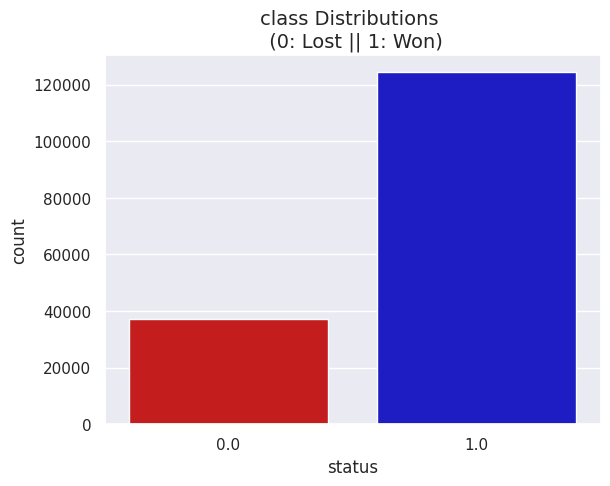

In [80]:
colors= ["#DF0101","#0101DF"]
sns.countplot(x="status", data=final, palette=colors)
plt.title('class Distributions \n (0: Lost || 1: Won)', fontsize=14)
plt.show()

In [87]:
#the class is imbalanced , so we need to balance it using oversampling technique
x=final.drop(['status',"width","thickness","selling_price","quantity tons"],axis=1)
y=final['status']
import imblearn
from imblearn.combine import SMOTETomek
model= SMOTETomek()
x_resampled, y_resampled = model.fit_resample(x, y)
x_resampled.shape, y_resampled.shape


((248176, 16), (248176,))

In [88]:
x.columns

Index(['customer', 'country', 'item type', 'application', 'product_ref',
       'quantity tons_log_skewed', 'width_log_skewed', 'thickness_log_skewed',
       'selling_price_log_skewed', 'difference_day', 'item_date_day',
       'item_date_month', 'item_date_year', 'delivery_date_day',
       'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [89]:
from sklearn.ensemble import (AdaBoostClassifier,
                              RandomForestClassifier,
                              ExtraTreesClassifier,
                              GradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [91]:
#finding the best model using the model
class classifier():

    def __init__(self, x, y):
        self.models = {
            'AdaBoostClassifier': AdaBoostClassifier(),
            'RandomForestClassifier': RandomForestClassifier(),
            'ExtraTreesClassifier': ExtraTreesClassifier(),
            'GradientBoostingClassifier': GradientBoostingClassifier(),
            'DecisionTreeClassifier': DecisionTreeClassifier(),
            'XGBClassifier': XGBClassifier()
        }
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    def evaluate_model(self, model_name, model):
        y_train_pred = model.fit(self.x_train, self.y_train).predict(self.x_train)
        y_test_pred = model.predict(self.x_test)

        result = {
            'Model_Name': model_name,
            'Train_accuracy': model.score(self.x_train, self.y_train),
            'Test_accuracy': model.score(self.x_test, self.y_test),
            'Train_precision': precision_score(self.y_train, y_train_pred),
            'Test_precision': precision_score(self.y_test, y_test_pred),
            'Train_recall': recall_score(self.y_train, y_train_pred),
            'Test_recall': recall_score(self.y_test, y_test_pred),
            'Train_f1': f1_score(self.y_train, y_train_pred),
            'Test_f1': f1_score(self.y_test, y_test_pred)
           }
        return result

    def best_model(self):
        reults=[self.evaluate_model(name, model) for name, model in self.models.items()]
        self.best_model_score= pd.DataFrame(reults)
        return self.best_model_score

In [94]:
#train and find best classifier models
models=classifier(x_resampled,y_resampled)
models.best_model()

,Model_Name,Train_accuracy,Test_accuracy,Train_precision,Test_precision,Train_recall,Test_recall,Train_f1,Test_f1
0,AdaBoostClassifier,0.79,0.79,0.80,0.79,0.77,0.77,0.78,0.78
1,RandomForestClassifier,1.00,0.99,1.00,0.99,1.00,0.98,1.00,0.99
2,ExtraTreesClassifier,1.00,0.99,1.00,0.99,1.00,0.98,1.00,0.99
3,GradientBoostingClassifier,0.82,0.82,0.84,0.84,0.80,0.80,0.82,0.82
4,DecisionTreeClassifier,1.00,0.97,1.00,0.97,1.00,0.97,1.00,0.97
5,XGBClassifier,0.95,0.95,0.97,0.97,0.93,0.93,0.95,0.95


In [ ]:
'''
as we see, ExtraTreesClassifier, RandomForestClassifier and DecisionTreeClassifier is the best model which have good testing accuracy but overfitted train accuracy
i am using RandomForestClassifier
'''

In [ ]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
parameters= {"max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             "criterion": ['gini', 'entropy'],
             "max_features": ['auto', 'sqrt', 'log2'],
             "min_samples_split": [2, 5, 10],
             "min_samples_leaf": [1, 2, 4],
             "bootstrap": [True, False],
             "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
gridsearch= GridSearchCV(clf, parameters)
gridsearch.fit(x_train, y_train)